# Classification task using Perceptron

## Setup and dataset generation

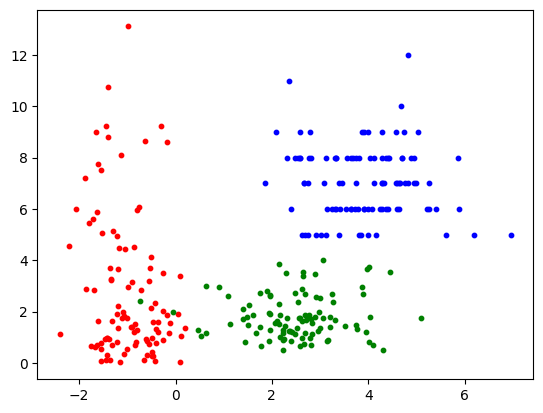

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# dataset generation
n_samples = 100

np.random.seed(123)
x11 = np.random.normal(loc=-1, scale=0.5, size=n_samples)
x12 = np.random.normal(loc=2.5, scale=1, size=n_samples)
x13 = np.random.normal(loc=4, scale=1, size=n_samples)


x21 = np.random.exponential(scale=3, size=n_samples)
x22 = np.random.lognormal(mean=0.5, sigma=0.5, size=n_samples)
x23 = np.random.poisson(lam=2, size=n_samples) + 5


# bias term
x0 = np.ones(3 * n_samples)

y1 = np.ones(n_samples) * 1
y2 = np.ones(n_samples) * 2
y3 = np.ones(n_samples) * 3


X = np.stack(
    (x0, np.concatenate((x11, x12, x13)), np.concatenate((x21, x22, x23))), axis=1
)
Y = np.concatenate((y1, y2, y3))

plt.scatter(x11, x21, color="red", s=10)
plt.scatter(x12, x22, color="green", s=10)
plt.scatter(x13, x23, color="blue", s=10)

### Choose a category

We want to train a binary classifier for class 3

To this purpose, we create a vector of labels Y_class that contains 1 for each object belonging to the class under study (positive class) and -1 for all other objects


In this way we transform the multiclass classification problem into a binary classification problem, which can be solved using the perceptron algorithm

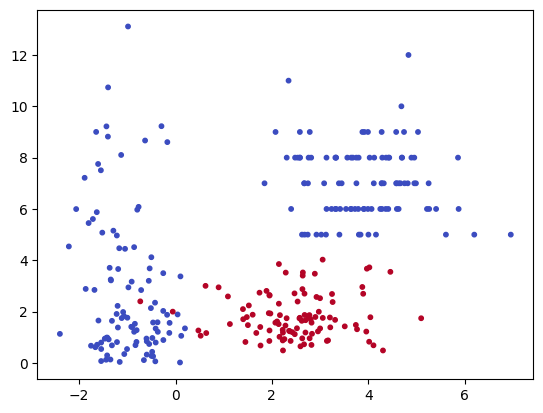

In [32]:
positive_class = 2

Y_class = -np.ones(y.shape)
Y_class[y == positive_class] = 1

plt.scatter(X[:, 1], X[:, 2], c=Y_class, cmap="coolwarm", s=10)

## Training the Perceptron with mini-batch Stochastic Gradient Descent

Stochastic Gradient Descent is an optimization algorithm used to minimize the loss function in machine learning models.

*Gradient Descent*: the idea is that by trying all possible weights we can find the best possible set of weights, which are the weights that minimize $E_in(h)$ (in-sample-error). The trick is take the derivative of the function and to move in the opposite direction, to try to find the minimum. Since the gradient can be very large/small we multiply it by a small number called the learning rate $\mu$ to mitigate this effect

$$
W_{new} = W_{old} - \mu \nabla E_{in}(h)
$$
where
$$
\nabla E_in(h) = - X^T (Y - XW)
$$

In **batch gradient descent**, we calculate the gradient cost function with respect to the paramenters using the entire training dataset. This is computationally intensie and may not converge to the optimal solution.

In **stochastic gradient descent**, we calculate the gradient of the cost function with respect to the parameters using a single training example. This is computationally efficient, however it might not converge to the optimal solution due to the randomness of the single example.

**Mini-batch stochastic gradient descent** combines the advantages of both batch gradient descent and stochastic gradient descent. Instead of using the entire training dataset or a single training example, we use a small batch of traning examples in each iteration. This reduces the computational cost while maining the stochastic nature of SDG.

There is no stopping criterion like in the classic perceptron. We can decide to stop if the difference in the error gets really small or if we each a certain number of epochs. But even after this we cannot be sure that we found a global minimum.

Number of errors 23.0


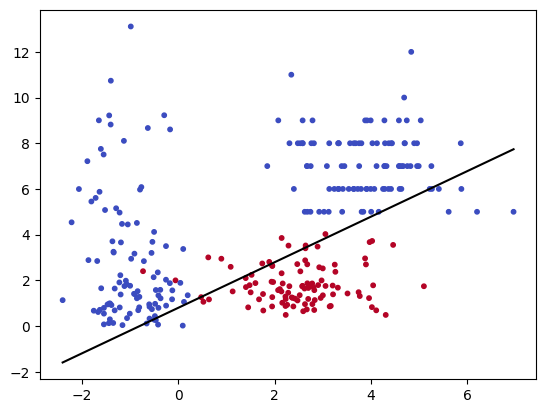

In [33]:
def sse(X, Y, W):
    return np.sum(np.square(np.dot(X, W) - Y))


W = np.random.uniform(low=-1, high=1, size=3)

eta = 1e-3
batch_size = 5
max_epochs = 100

sse_epoch = np.zeros(max_epochs + 1)
error_epoch = np.zeros(max_epochs + 1)

for epoch in range(max_epochs):
    sse_epoch[epoch] = sse(X, Y, W)
    error_epoch[epoch] = sum((Y_class * np.sign(np.dot(X, W)) < 0))

    rand_perm = np.random.permutation(range(Y_class.shape[0]))
    X = X[rand_perm, :]
    Y_class = Y_class[rand_perm]

    for j in range(0, Y_class.shape[0], batch_size):
        X_batch = X[j : j + batch_size, :]
        Y_batch = Y_class[j : j + batch_size]
        W = W + eta * X_batch.T @ (Y_batch - X_batch @ W)
    sse_epoch[epoch + 1] = sse(X, Y_class, W)
    error_epoch[epoch + 1] = sum((Y_class * np.sign(np.dot(X, W)) < 0))

print(f"Number of errors {error_epoch[-1]}")

plt.scatter(X[:, 1], X[:, 2], c=Y_class, cmap="coolwarm", s=10)
intercept = -W[0] / W[2]
slope = -W[1] / W[2]

plt.plot(
    [np.min(X[:, 1]), np.max(X[:, 1])],
    [np.min(X[:, 1]) * slope + intercept, np.max(X[:, 1]) * slope + intercept],
    color="black",
)

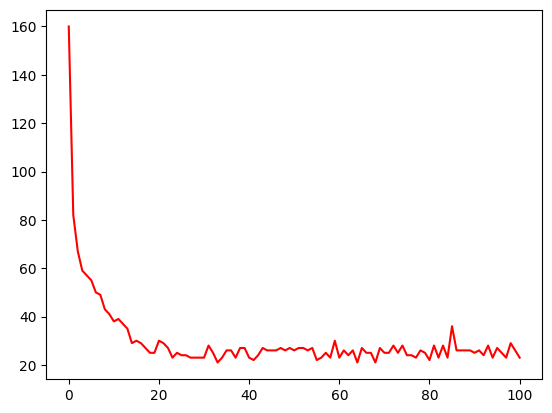

In [34]:
plt.plot(range(max_epochs + 1), error_epoch, color="red")